 RESTAURANT RATING PREDICTOR
Dataset is loaded
Top 10 most influential Features features on restaurant ratings:
                                               Criteria     Score
1                                                 Votes  0.946719
0                                  Average Cost for two  0.009739
2537                     Cuisines_North Indian, Chinese  0.000815
2728            Cuisines_North Indian, Mughlai, Chinese  0.000697
2834                          Cuisines_Pizza, Fast Food  0.000594
1129                     Locality_V3S Mall, Laxmi Nagar  0.000593
1266  Cuisines_American, Fast Food, Salad, Healthy Food  0.000526
907                                  Locality_Sector 18  0.000514
941                                  Locality_Sector 50  0.000456
2722                     Cuisines_North Indian, Mughlai  0.000410

Mean Square Error :  0.3313
R2 Score: 0.95


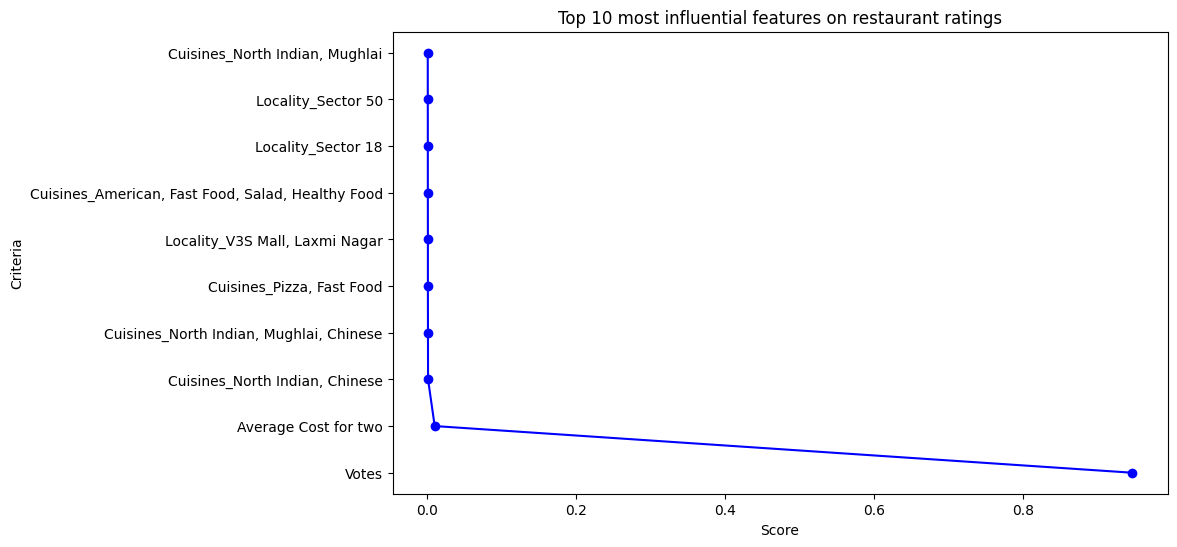

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

print(" RESTAURANT RATING PREDICTOR")

df=pd.read_csv("D:\intern\Dataset .csv")
df=df.dropna()
print("Dataset is loaded")

x=df[['Locality','Cuisines','Average Cost for two','Votes']]
y=df['Aggregate rating']

x=pd.get_dummies(x)

scale= StandardScaler()
x[['Average Cost for two','Votes']]=scale.fit_transform(x[['Average Cost for two','Votes']])

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,train_size=0.8,random_state=42)
model=RandomForestRegressor(n_estimators = 100,random_state=42)
model.fit(x_train,y_train)
prediction=model.predict(x_test)

imp=model.feature_importances_
feature_name=x.columns
feature_df=pd.DataFrame({'Criteria':feature_name,'Score':imp}).sort_values(by='Score',ascending = False)


print("Top 10 most influential Features features on restaurant ratings:")
print(feature_df.head(10))
print()

mse=mean_squared_error(y_test,prediction)
r2=r2_score(y_test,prediction)
print("Mean Square Error : ",round(mse**0.5,4))
print("R2 Score:",round(r2,2))


plt.figure(figsize=(10,6))
plt.plot(feature_df.head(10)['Score'],feature_df.head(10)['Criteria'],marker='o',linestyle='-',color='blue')
plt.xlabel('Score')
plt.ylabel('Criteria')
plt.title("Top 10 most influential features on restaurant ratings")
plt.tight_layout
plt.show()